### Teknik Analiz Nedir?

Birtakım matematiksel ve istatistiksel yöntemleri kullanarak bir serinin geçmiş dönem fiyat hareketleri üzerinden serinin yönünü ve değişimini tahmin etmeye yarayan yöntemlerdir.

**En Çok Kullanılan Teknik Analiz İndikatörleri**

**Trend:** Hareketli Ortalamalar, MACD

Fiyat hareketlerinin farklı periyotlar için hareketli ortalaması trendin yönü hakkında bilgi vericidir.

5 günlük, 14 günlük, 21 günlük, 100 günlük hareketli ortalamalar fiyatın hareketleri ile değişmektedir.

**Volatilite:** Bollinger Bantları

Volatilite, istatistikte standart sapma olarak da bilinmektedir. Fiyat hareketlerinin standart sapmaları ile oynaklık sürece dahil edilmiş olur.

Belirli bir hisse senedi üzerinde çeşitli alım ve satımlar mevcuttur. Bu alım ve satımlar, fiyat hareketlerini etkilemektedir. Hacim ne kadar artarsa, alım ve satımlar da o kadar artmaktadır ve bunlarla beraber bu hareketlerin standart sapması da artmaktadır.

20 günlük hareketli ortalama ve 2 standart sapma ile kullanılır.

**Momentum:** RSI

RSI, 0-100 arasında salınım gösterir.

30-70 sınırları alım satım fırsatını gösterir. 30'un altı aşırı satım bölgesi, 70'in üzeri ise aşırı alım bölgesi olarak adlandırılmaktadır.

Fiyatın ağırlıklı olarak yönünü/şiddetini tayin etmede başarılı bir indikatördür.

**Hacim:** Hacim Ağırlıklı Hareketli Ortalama (VWMA)

Hacim hesaplanırken, ağırlıklı hareketli ortalama yöntemi (AHO) kullanılmaktadır. Buradaki temel amacımız, yukarıda belirtildiği üzere hacimli işlemlerde bu durumun hesaba katılması gerekmektedir. Eğer bir yükseliş, hacimli bir yükseliş ise normal hacimli bir yükselişe göre daha fazla yükselmektedir. 

Hacim verisinin hareketli ortalama sürecine dahil edilmesi ile fiyat hareketinin şiddeti de sürece dahil edilmiş olur.

#### 2. Python ile Teknik Analiz Uygulamaları

In [1]:
# Gerekli kütüphane ve fonksiyonların kurulması

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

import yfinance as yf
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

**Veri Okuma İşlemi | Yahoo Finance**

In [2]:
apple_df = yf.download('AAPL', start = '2017-01-01', end = '2020-10-17', progress = False)

apple_df_index = pd.to_datetime(apple_df.index)

apple_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,28.950001,29.082500,28.690001,29.037500,26.952707,115127600
2017-01-04,28.962500,29.127501,28.937500,29.004999,26.922537,84472400
2017-01-05,28.980000,29.215000,28.952499,29.152500,27.059450,88774400
2017-01-06,29.195000,29.540001,29.117500,29.477501,27.361116,127007600
2017-01-09,29.487499,29.857500,29.485001,29.747499,27.611734,134247600


In [3]:
apple_df.shape

(955, 6)

**Hareketli Ortalama Yöntemi**

In [4]:
close_app = apple_df.iloc[: len(apple_df) // 2, 3] # Daha rahat gözlemler yapabilmek adına ilgili datanın yarısını alıyoruz.

close_app.head()

Date
2017-01-03    29.037500
2017-01-04    29.004999
2017-01-05    29.152500
2017-01-06    29.477501
2017-01-09    29.747499
Name: Close, dtype: float64

In [5]:
rolling_app5 = close_app.rolling(window = 5).mean()
rolling_app14 = close_app.rolling(window = 14).mean()
rolling_app21 = close_app.rolling(window = 21).mean()

In [6]:
MAs = pd.concat([close_app, rolling_app5, rolling_app14, rolling_app21], axis = 1)

MAs.columns = ["Close", "Short", "Mid", "Long"]

MAs.head()

,Close,Short,Mid,Long
Date,,,,
2017-01-03,29.037500,NaN,NaN,NaN
2017-01-04,29.004999,NaN,NaN,NaN
2017-01-05,29.152500,NaN,NaN,NaN
2017-01-06,29.477501,NaN,NaN,NaN
2017-01-09,29.747499,29.284,NaN,NaN


In [7]:
MAs.dropna(axis = 0, inplace = True) 

MAs.head()

,Close,Short,Mid,Long
Date,,,,
2017-02-01,32.187500,30.7810,30.278750,30.001786
2017-02-02,32.132500,31.1105,30.444464,30.149167
2017-02-03,32.270000,31.4670,30.623750,30.304643
2017-02-06,32.572498,31.9000,30.807500,30.467500
2017-02-07,32.882500,32.4090,31.013571,30.629643


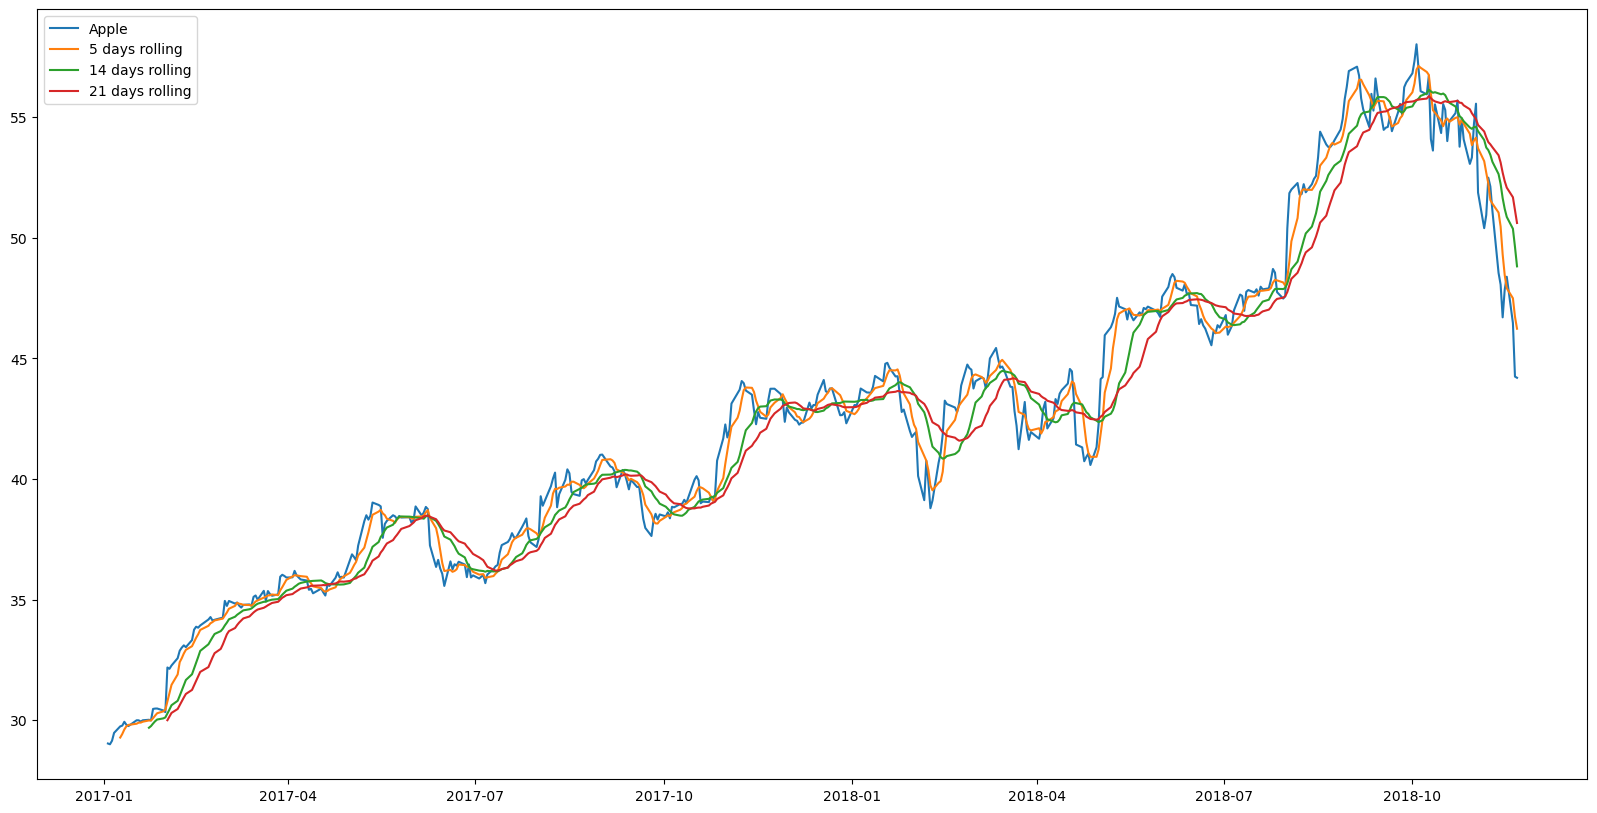

In [8]:
fig, ax = plt.subplots(figsize = (20, 10))

ax.plot(close_app.index, close_app, label = "Apple")

ax.plot(rolling_app5.index, rolling_app5, label = "5 days rolling")

ax.plot(rolling_app14.index, rolling_app14, label = "14 days rolling")

ax.plot(rolling_app21.index, rolling_app21, label = "21 days rolling")

ax.legend(loc = "upper left")

In [9]:
np.sort(MAs["Short"] - MAs["Mid"])

array([-2.95496439e+00, -2.89510700e+00, -2.88046423e+00, -2.74207153e+00,
       -2.58467860e+00, -2.33253572e+00, -1.97396436e+00, -1.87296437e+00,
       -1.81078568e+00, -1.80632155e+00, -1.76432174e+00, -1.75871435e+00,
       -1.73453565e+00, -1.71635726e+00, -1.64132129e+00, -1.60935723e+00,
       -1.59553561e+00, -1.58460715e+00, -1.50189291e+00, -1.49764317e+00,
       -1.44917831e+00, -1.42974957e+00, -1.37967873e+00, -1.35439311e+00,
       -1.33753619e+00, -1.33035736e+00, -1.29778584e+00, -1.29674993e+00,
       -1.25464292e+00, -1.25285677e+00, -1.24389300e+00, -1.22364219e+00,
       -1.19346401e+00, -1.16678499e+00, -1.13000020e+00, -1.08750027e+00,
       -1.08078542e+00, -1.07835672e+00, -1.04575026e+00, -1.04482160e+00,
       -1.04257153e+00, -1.02742876e+00, -1.02139260e+00, -1.00196446e+00,
       -9.94179589e-01, -9.81965092e-01, -9.55464118e-01, -9.54785810e-01,
       -9.32820783e-01, -9.13857324e-01, -8.91820799e-01, -8.77142988e-01,
       -8.64785658e-01, -

In [10]:
MAs[(np.array(MAs["Short"] - MAs["Mid"]) > 0)]

,Close,Short,Mid,Long
Date,,,,
2017-02-01,32.187500,30.781000,30.278750,30.001786
2017-02-02,32.132500,31.110500,30.444464,30.149167
2017-02-03,32.270000,31.467000,30.623750,30.304643
2017-02-06,32.572498,31.900000,30.807500,30.467500
2017-02-07,32.882500,32.409000,31.013571,30.629643
...,...,...,...,...
2018-10-03,58.017502,56.965000,55.691429,55.710119
2018-10-04,56.997501,57.117001,55.765536,55.723453
2018-10-05,56.072498,57.044500,55.880000,55.737619


In [11]:
def buy_sell_MA(data, opt = 50):
    buy_sell = []
    buy_signal = []
    sell_signal = []
    flag = 42
    
    up = data[(np.array(MAs["Short"] - data["Mid"]) > 0) & (np.array(data["Short"] - data["Long"]) > 0)]
    down = data[(np.array(MAs["Short"] - data["Mid"]) < 0) & (np.array(data["Short"] - data["Long"]) < 0)]
    
    ups = np.percentile(np.array(up["Short"] - up["Mid"]), opt)
    downs = np.percentile(np.array(down["Short"] - down["Long"]), opt)
    

    for i in range(0, len(data)):
        if (data["Short"][i] > data["Mid"][i] + ups) & (data["Short"][i] > data["Long"][i] + ups):
            buy_signal.append(np.nan)
            if flag != 1:
                sell_signal.append(data["Close"][i])
                buy_sell.append(data["Close"][i])
                flag = 1
            else:
                sell_signal.append(np.nan)
        elif (data["Short"][i] < data["Mid"][i] + downs) & (data["Short"][i] < data["Long"][i] + downs):
            sell_signal.append(np.nan)
            if flag != 0:
                buy_signal.append(data["Close"][i])
                buy_sell.append(- data["Close"][i])
                flag = 0
            else:
                buy_signal.append(np.nan)
        else:
            buy_sell.append(np.nan)
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)
    
        operations = np.array(buy_sell)
        operations = operations[~ np.isnan(operations)]
    
        neg = 0
        pos = 0
    
        for i in range(len(operations)):
            if operations[i] < 0:
                neg = i
                break
        for i in range(1, len(operations)):
            if operations[-i] > 0:
                pos = i-1
                break
    
        operations = operations[neg:-pos]
        PL = np.sum(operations)
    
    return buy_signal, sell_signal, PL

In [12]:
MAs["BUY"] = buy_sell_MA(MAs)[0]
MAs["SELL"] = buy_sell_MA(MAs)[1]

In [13]:
buy_sell_MA(MAs)[2]

14.045001983642578

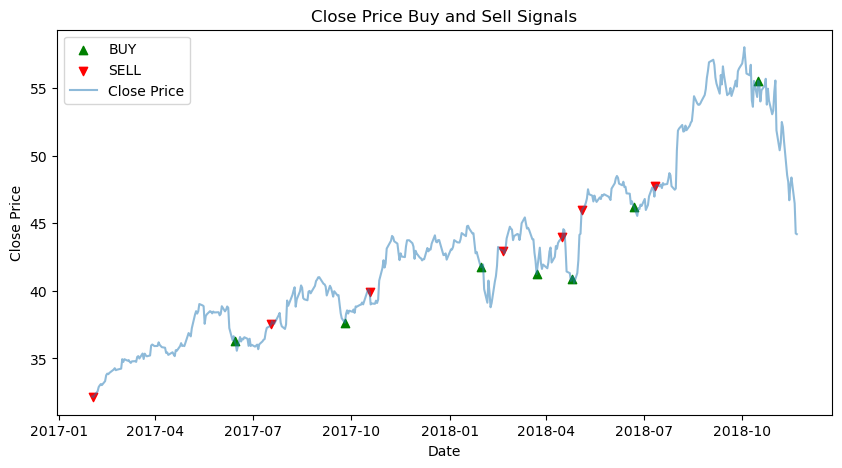

In [14]:
plt.figure(figsize = (10, 5))

plt.scatter(MAs.index, MAs["BUY"], color = "green", label = "BUY", marker = '^', alpha = 1)
plt.scatter(MAs.index, MAs["SELL"], color = "red", label = "SELL", marker = 'v', alpha = 1)
plt.plot(MAs["Close"], label = "Close Price", alpha = 0.5)
plt.title("Close Price Buy and Sell Signals")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc = "upper left")

plt.show()

In [15]:
opt = []

percentile = np.arange(10, 91, 5)

for i, j in enumerate(percentile):
    opt.append((percentile[i], buy_sell_MA(MAs, j)[2]))
    
opt = pd.DataFrame(opt)

opt.columns = ["Percentile", "Performance"]

opt = opt.sort_values(by = "Performance", ascending = False)

opt

,Percentile,Performance
12,70,22.297504
15,85,21.952507
13,75,19.815002
11,65,19.375004
10,60,19.245003
9,55,18.935001
16,90,18.607502
14,80,17.972504
7,45,14.780003
6,40,14.235008


In [16]:
MAs["BUY"] = buy_sell_MA(MAs, opt["Percentile"].values[0])[0]
MAs["SELL"] = buy_sell_MA(MAs, opt["Percentile"].values[0])[1]

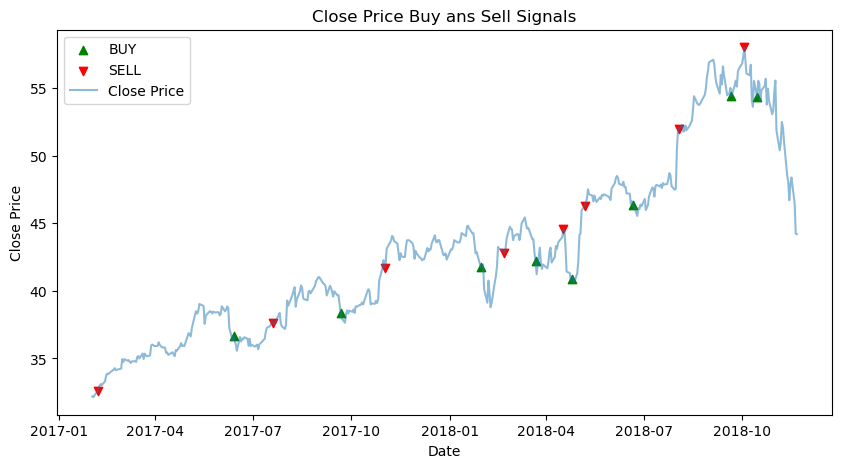

In [17]:
plt.figure(figsize = (10, 5))
plt.scatter(MAs.index, MAs["BUY"], color = "green", label = "BUY", marker = '^', alpha = 1)
plt.scatter(MAs.index, MAs["SELL"], color = "red", label = "SELL", marker = 'v', alpha = 1)
plt.plot(MAs["Close"], label = "Close Price", alpha = 0.5)
plt.title("Close Price Buy ans Sell Signals")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend(loc = "upper left")
plt.show()

In [18]:
buy_sell_MA(MAs, opt["Percentile"].values[0])[2] # %75 percentile değeri ile, yaklaşık 22.297 birimlik kar elde edilmektedir.

22.297504425048828

#### Bollinger Bandları

Bollinger bantları da yine ortalama hesabı üzerine kuruludur. Fakat burada ek olarak birde standart sapma işlemi uygulanmaktadır. Çünkü, bir hareketin standart sapması, hareketin yönünü belirlediği gibi şiddetini de belirlemektedir. Bir hisse senedinin standart sapması yüksek ise, yukarı veya aşağı yönlü harekete eğilimi normal standart sapma değerlerine göre daha fazladır. Bu yüzden Bollinger Bandları'nda da ilgili hisse senetleri analiz edilirken 20 günlük basit hareketli ortalama ve 20 günlük standart sapma değerleri hesaplanmaktadır. 

In [19]:
BBs = pd.DataFrame()

BBs["close"] = MAs["Close"]
BBs["SMA"] = MAs["Close"].rolling(window = 20).mean()
BBs["STD"] = MAs["Close"].rolling(window = 20).std()
BBs["upper"] = BBs["SMA"] + BBs["STD"] * 2
BBs["lower"] = BBs["SMA"] - BBs["STD"] * 2

BBs.dropna(axis = 0, inplace = True)

BBs.head()

,close,SMA,STD,upper,lower
Date,,,,,
2017-03-01,34.947498,33.504500,0.814171,35.132842,31.876157
2017-03-02,34.740002,33.632125,0.796731,35.225587,32.038662
2017-03-03,34.945000,33.772750,0.765716,35.304181,32.241318
2017-03-06,34.834999,33.901000,0.713820,35.328640,32.473359
2017-03-07,34.880001,34.016375,0.673113,35.362602,32.670148


In [20]:
def buy_sell_BB(data):
    buy_sell = []
    buy_signal = []
    sell_signal = []
    flag = 42 
   
    for i in range(0, len(data)):
        if data["close"][i] > data["upper"][i]:
            buy_signal.append(np.nan)
            if flag != 1:
                sell_signal.append(data["close"][i])
                buy_sell.append(data["close"][i])
                flag = 1
            else:
                sell_signal.append(np.nan)
        elif data["close"][i] < data["lower"][i]:
            sell_signal.append(np.nan)
            if flag != 0:
                buy_signal.append(data["close"][i])
                buy_sell.append(-data["close"][i])
                flag = 0
            else:
                buy_signal.append(np.nan)
        else:
            buy_sell.append(np.nan)
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)
    
        operations = np.array(buy_sell)
        operations = operations[~ np.isnan(operations)]
        
        neg = 0
        pos = 0
        
        for i in range(len(operations)):
            if operations[i] < 0:
                neg = i
                break
        for i in range(1, len(operations)):
            if operations[-i] > 0:
                pos = i-1
                break
        
        operations = operations[neg:-pos]
        PL = np.sum(operations)
    
    return buy_signal, sell_signal, PL

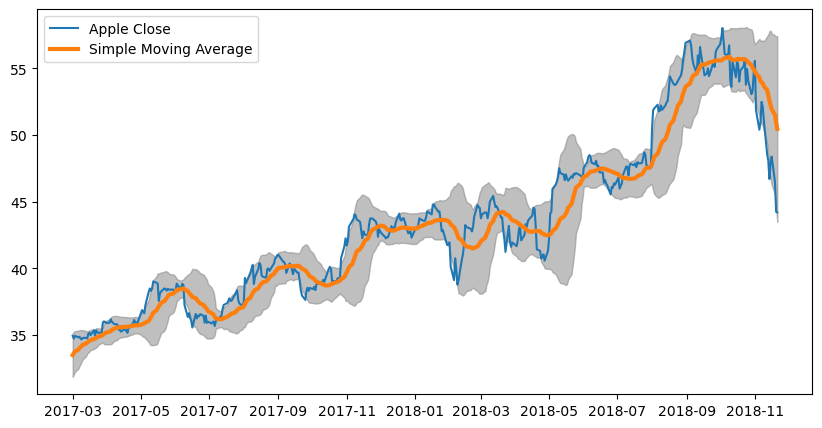

In [21]:
fig = plt.figure(figsize = (10, 5))

ax = fig.add_subplot(1, 1, 1)
x_axis = BBs.index

ax.fill_between(x_axis, BBs["upper"], BBs["lower"], color = "grey", alpha = 0.5)
ax.plot(x_axis, BBs["close"], label = "Apple Close")
ax.plot(x_axis, BBs["SMA"], label = "Simple Moving Average", lw = 3)
ax.legend()

In [22]:
BBs["BUY"] = buy_sell_BB(BBs)[0]
BBs["SELL"] = buy_sell_BB(BBs)[1]

In [23]:
buy_sell_BB(BBs)[2]

9.450000762939453

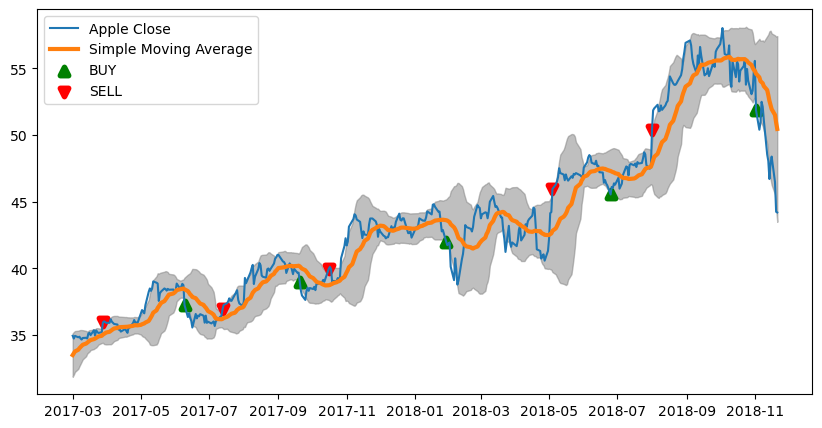

In [24]:
fig = plt.figure(figsize = (10, 5))

ax = fig.add_subplot(1, 1, 1)
x_axis = BBs.index

ax.fill_between(x_axis, BBs["upper"], BBs["lower"], color = "grey", alpha = 0.5)
ax.plot(x_axis, BBs["close"], label = "Apple Close")
ax.plot(x_axis, BBs["SMA"], label = "Simple Moving Average", lw = 3)
ax.scatter(x_axis, BBs["BUY"], color = "green", lw = 4, label = "BUY", marker = '^')
ax.scatter(x_axis, BBs["SELL"], color = "red", lw = 4, label = "SELL", marker = 'v')
ax.legend()

In [25]:
desicions = pd.merge(BBs[["BUY", "SELL"]], MAs[["BUY", "SELL"]], left_index = True, right_index = True)

desicions.columns = ["BUY_MA", "SELL_MA", "BUY_BB", "SELL_BB"]

desicions.head()

,BUY_MA,SELL_MA,BUY_BB,SELL_BB
Date,,,,
2017-03-01,NaN,NaN,NaN,NaN
2017-03-02,NaN,NaN,NaN,NaN
2017-03-03,NaN,NaN,NaN,NaN
2017-03-06,NaN,NaN,NaN,NaN
2017-03-07,NaN,NaN,NaN,NaN


In [26]:
desicions.dropna(thresh = 1, axis = 0).head()

,BUY_MA,SELL_MA,BUY_BB,SELL_BB
Date,,,,
2017-03-28,NaN,35.950001,NaN,NaN
2017-06-09,37.244999,NaN,NaN,NaN
2017-06-13,NaN,NaN,36.647499,NaN
2017-07-13,NaN,36.942501,NaN,NaN
2017-07-20,NaN,NaN,NaN,37.584999


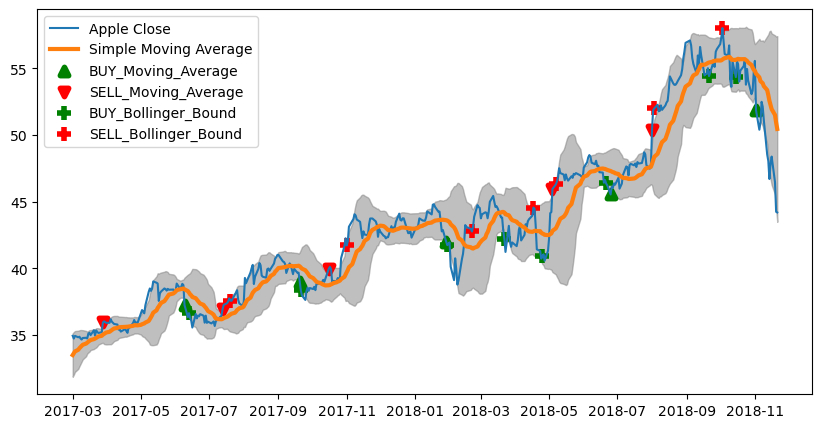

In [27]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot(1, 1, 1)
x_axis = BBs.index

ax.fill_between(x_axis, BBs["upper"], BBs["lower"], color = "grey", alpha = 0.5)
ax.plot(x_axis, BBs["close"], label = "Apple Close")
ax.plot(x_axis, BBs["SMA"], label = "Simple Moving Average", lw = 3)

ax.scatter(x_axis, desicions["BUY_MA"], color = "green", lw = 4, label = "BUY_Moving_Average", marker = '^')
ax.scatter(x_axis, desicions["SELL_MA"], color = "red", lw = 4, label = "SELL_Moving_Average", marker = 'v')
ax.scatter(x_axis, desicions["BUY_BB"], color = "green", lw = 4, s = 100, label = "BUY_Bollinger_Bound", marker = '+')
ax.scatter(x_axis, desicions["SELL_BB"], color = "red", lw = 4, s= 100, label = "SELL_Bollinger_Bound", marker = '+')

ax.legend()

#### MACD Indikatörü

MACD, yine trend indikatörlerinden bir tanesisidir. Burada ek olarak:

In [28]:
MDs = pd.DataFrame()

MDs["close"] = MAs["Close"]
MDs["short"] = MDs["close"].ewm(span = 12, adjust = False).mean()
MDs["long"] = MDs["close"].ewm(span = 26, adjust = False).mean()
MDs["MACD"] = MDs["short"] - MDs["long"]
MDs["signal"] = MDs["MACD"].ewm(span = 9, adjust = False).mean()

MDs.head()

,close,short,long,MACD,signal
Date,,,,,
2017-02-01,32.187500,32.187500,32.187500,0.000000,0.000000
2017-02-02,32.132500,32.179038,32.183426,-0.004387,-0.000877
2017-02-03,32.270000,32.193033,32.189839,0.003194,-0.000063
2017-02-06,32.572498,32.251412,32.218184,0.033228,0.006595
2017-02-07,32.882500,32.348502,32.267393,0.081110,0.021498


In [29]:
MDs.shape

(457, 5)

**Not:** Üssel hareketli ortalama, normal hareketli ortalamaya göre daha farklı işlenmektedir. Buradaki temel mantık son gözlemlere daha çok ağırlık vererek, daha eski gözlemlere daha az ağırlık verir. 

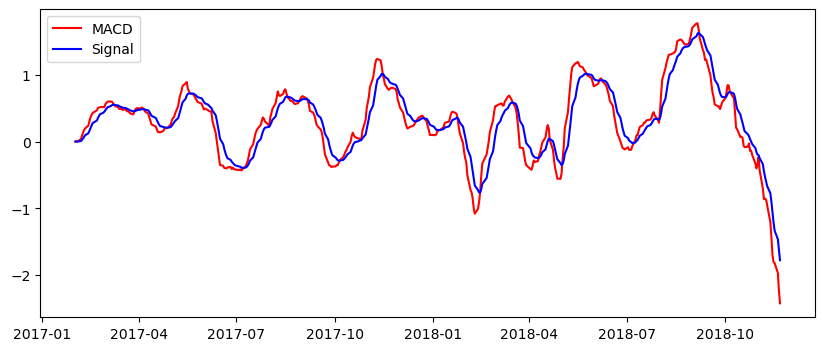

In [30]:
plt.figure(figsize = (10, 4))
plt.plot(MDs.index, MDs.MACD, color = "red", label = "MACD")
plt.plot(MDs.index, MDs.signal, color = "blue", label = "Signal")
plt.legend(loc = "upper left")
plt.show()

In [31]:
def buy_sell_MD(data, opt=50):
    buy_sell = []
    buy_signal = []
    sell_signal = []
    flag = 42
    
    up = data[np.array(data["MACD"] - data["signal"]) > 0]
    down = data[np.array(data["MACD"] - data["signal"]) < 0]
    
    ups = np.percentile(np.array(up["MACD"] - up["signal"]), opt)
    downs = np.percentile(np.array(down["MACD"] - down["signal"]), opt)
    
    for i in range(0, len(data)):
        if (data["MACD"][i] > data["signal"][i] + ups):
            buy_signal.append(np.nan)
            if flag != 1:
                sell_signal.append(data["close"][i])
                buy_sell.append(data["close"][i])
                flag = 1
            else:
                sell_signal.append(np.nan)
        elif (data["MACD"][i] < data["signal"][i] + downs):
            sell_signal.append(np.nan)
            if flag != 0:
                buy_signal.append(data["close"][i])
                buy_sell.append(-data["close"][i])
                flag = 0
            else:
                buy_signal.append(np.nan)
        else:
            buy_sell.append(np.nan)
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)
            
        operations = np.array(buy_sell)
        operations = operations[~ np.isnan(operations)]
        
        neg = 0
        pos = 0
        
        for i in range(len(operations)):
            if operations[i] < 0:
                neg = i
                break
        for i in range(1, len(operations)):
            if operations[-i] > 0:
                pos = i-1
                break
                
        operations = operations[neg:-pos]
        PL = np.sum(operations)
        
    return (buy_signal, sell_signal, PL)         

In [32]:
MAs["BUY"] = buy_sell_MD(MDs)[0]
MAs["SELL"] = buy_sell_MD(MDs)[1]

In [33]:
buy_sell_MD(MDs)[2]

13.937507629394531

In [34]:
opt = []

percentile = np.arange(10, 91, 5)

for i, j in enumerate(percentile):
    opt.append((percentile[i], buy_sell_MD(MDs, j)[2]))
    
opt = pd.DataFrame(opt)

opt.columns = ["Percentile", "Performance"]

opt = opt.sort_values(by = "Performance", ascending = False)

opt

,Percentile,Performance
9,55,17.367496
14,80,16.482494
16,90,15.830002
15,85,14.999996
13,75,14.497501
8,50,13.937508
4,30,13.625008
12,70,13.445000
5,35,12.877499
6,40,11.747501


In [35]:
MDs["BUY"] = buy_sell_MD(MDs, opt["Percentile"].values[0])[0]
MDs["SELL"] = buy_sell_MD(MDs, opt["Percentile"].values[0])[1]

In [36]:
buy_sell_MD(MDs, opt["Percentile"].values[0])[2]

17.367496490478516

In [37]:
desicions = pd.merge(BBs[["BUY", "SELL"]], MAs[["BUY", "SELL"]], left_index = True, right_index = True)

desicions = pd.merge(desicions, MDs[["BUY", "SELL"]], left_index = True, right_index = True)

desicions.columns = ["BUY_MA", "SELL_MA", "BUY_BB", "SELL_BB", "BUY_MACD", "SELL_MACD"]

desicions.dropna(thresh = 2, axis = 0).head()

,BUY_MA,SELL_MA,BUY_BB,SELL_BB,BUY_MACD,SELL_MACD
Date,,,,,,
2017-05-08,NaN,NaN,NaN,38.252499,NaN,38.252499
2017-06-09,37.244999,NaN,37.244999,NaN,37.244999,NaN
2017-07-13,NaN,36.942501,NaN,36.942501,NaN,NaN
2017-10-16,NaN,39.970001,NaN,39.970001,NaN,39.970001
2017-11-20,NaN,NaN,42.494999,NaN,42.494999,NaN


**RSI Indikatörü**

Burada **diff()** alma işlemindeki temel amaç, hergün bir sonraki günden ne kadar fazla veya ne kadar az (ne kadar yükselmiş veya ne kadar düşmüş) analiz etmek için kullanılır. RSI'ın türkçesi **"Göreceli Güç Endeksi"** olarak adlandırılmaktadır. Yani, bu işlemleri gerçekleştirirken momentumu hesaba katıyoruz.

Pozitif_Kapanislar = Kapanis_simdikibar - Kapanis_oncekibar

Negatif_Kapanislar = Kapanis_simdikibar - Kapanis_oncekibar

RS = Ortalama (Pozitif_Kapanislar) / Ortalama (Negatif_Kapanislar)

RSI = 100 - (100 / (1 + RS))

In [38]:
RSs = pd.DataFrame()

RSs["Close"] = MAs["Close"]
RSs["Diff"] = RSs["Close"].diff(1)

RSs["Gain"] = RSs["Diff"].mask(RSs["Diff"] < 0,0)
RSs["Loss"] = RSs["Diff"].mask(RSs["Diff"] > 0,0)

RSs.head()

,Close,Diff,Gain,Loss
Date,,,,
2017-02-01,32.187500,NaN,NaN,NaN
2017-02-02,32.132500,-0.055000,0.000000,-0.055
2017-02-03,32.270000,0.137501,0.137501,0.000
2017-02-06,32.572498,0.302498,0.302498,0.000
2017-02-07,32.882500,0.310001,0.310001,0.000


In [39]:
RSs["Avg_Gain"] = RSs["Gain"].rolling(window = 14).mean()
RSs["Avg_Loss"] = RSs["Loss"].rolling(window = 14).mean()

RSs.head(18)

,Close,Diff,Gain,Loss,Avg_Gain,Avg_Loss
Date,,,,,,
2017-02-01,32.187500,NaN,NaN,NaN,NaN,NaN
2017-02-02,32.132500,-0.055000,0.000000,-0.055000,NaN,NaN
2017-02-03,32.270000,0.137501,0.137501,0.000000,NaN,NaN
2017-02-06,32.572498,0.302498,0.302498,0.000000,NaN,NaN
2017-02-07,32.882500,0.310001,0.310001,0.000000,NaN,NaN
2017-02-08,33.009998,0.127499,0.127499,0.000000,NaN,NaN
2017-02-09,33.105000,0.095001,0.095001,0.000000,NaN,NaN
2017-02-10,33.029999,-0.075001,0.000000,-0.075001,NaN,NaN
2017-02-13,33.322498,0.292500,0.292500,0.000000,NaN,NaN


In [40]:
rs = abs(RSs["Avg_Gain"] / RSs["Avg_Loss"])

RSs["rsi"] = 100 - (100 / (1 + rs))

RSs.head()

,Close,Diff,Gain,Loss,Avg_Gain,Avg_Loss,rsi
Date,,,,,,,
2017-02-01,32.187500,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-02,32.132500,-0.055000,0.000000,-0.055,NaN,NaN,NaN
2017-02-03,32.270000,0.137501,0.137501,0.000,NaN,NaN,NaN
2017-02-06,32.572498,0.302498,0.302498,0.000,NaN,NaN,NaN
2017-02-07,32.882500,0.310001,0.310001,0.000,NaN,NaN,NaN


In [41]:
def buy_sell_RS(data, opt_low = 30, opt_high = 70):
    buy_sell = []
    buy_signal = []
    sell_signal = []
    flag = 42
    
    for i in range(0, len(data)):
        if (data["rsi"][i] > opt_high):
            buy_signal.append(np.nan)
            if flag != 1:
                sell_signal.append(data["Close"][i])
                buy_sell.append(data["Close"][i])
                flag = 1
            else:
                sell_signal.append(np.nan)
        elif (data["rsi"][i] < opt_low):
            sell_signal.append(np.nan)
            if flag != 0:
                buy_signal.append(data["Close"][i])
                buy_sell.append(-data["Close"][i])
                flag = 0
            else:
                buy_signal.append(np.nan)
        else:
            buy_sell.append(np.nan)
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)
            
        operations = np.array(buy_sell)
        operations = operations[~np.isnan(operations)]
            
        neg = 0
        pos = 0
            
        for i in range(len(operations)):
            if operations[i] < 0:
                neg = i
                break
                    
        for i in range(1, len(operations)):
            if operations[-i] > 0:
                pos = i-1
                break
                    
        operations = operations[neg:-pos]
        PL = np.sum(operations)
            
    return (buy_signal, sell_signal, PL)

In [42]:
RSs["BUY"] = buy_sell_RS(RSs)[0]
RSs["SELL"] = buy_sell_RS(RSs)[1]

In [43]:
buy_sell_RS(RSs)[2]

12.96500015258789

In [44]:
opt = []

percentile = np.arange(0, 100, 1)

for i, j in enumerate(percentile):
    if j < 50:
        opt.append((percentile[i], percentile[-(i+1)], buy_sell_RS(RSs, opt_low = percentile[i], opt_high = percentile[-(i+1)])[2]))
        
opt = pd.DataFrame(opt)

opt.columns = ["Low_Value", "High_Value", "Performance"]

opt = opt.sort_values(by = "Performance", ascending = False)

opt.head()

,Low_Value,High_Value,Performance
38,38,61,17.282497
39,39,60,17.037498
37,37,62,16.034996
40,40,59,14.852505
41,41,58,14.722504


In [45]:
RSs["BUY"] = buy_sell_RS(RSs, opt_low = opt["Low_Value"].values[0], opt_high = opt["High_Value"].values[0])[0]
RSs["SELL"] = buy_sell_RS(RSs, opt_low = opt["Low_Value"].values[0], opt_high = opt["High_Value"].values[0])[1]

In [46]:
buy_sell_RS(RSs, opt_low = opt["Low_Value"].values[0], opt_high = opt["High_Value"].values[0])[2]

17.28249740600586

In [47]:
desicions = pd.merge(BBs[["BUY", "SELL"]], MAs[["BUY", "SELL"]], left_index = True, right_index = True)

desicions = pd.merge(desicions, MDs[["BUY", "SELL"]], left_index = True, right_index = True)

desicions = pd.merge(desicions, RSs[["BUY", "SELL"]], left_index = True, right_index = True)

desicions.columns = ["BUY_MA", "SELL_MA", "BUY_BB", "SELL_BB", "BUY_MACD", "SELL_MACD", "BUY_RSI", "SELL_RSI"]

desicions.dropna(thresh = 2, axis = 0).head()

,BUY_MA,SELL_MA,BUY_BB,SELL_BB,BUY_MACD,SELL_MACD,BUY_RSI,SELL_RSI
Date,,,,,,,,
2017-05-08,NaN,NaN,NaN,38.252499,NaN,38.252499,NaN,NaN
2017-06-09,37.244999,NaN,37.244999,NaN,37.244999,NaN,37.244999,NaN
2017-07-13,NaN,36.942501,NaN,36.942501,NaN,NaN,NaN,NaN
2017-10-16,NaN,39.970001,NaN,39.970001,NaN,39.970001,NaN,NaN
2017-11-20,NaN,NaN,42.494999,NaN,42.494999,NaN,NaN,NaN


#### VWMA

Volume Weighted Moving Average (VWMA), bir fiyat hareketinin hacmini de hesaba katarak daha sağlıklı sonuçlar elde etmemizi sağlayacaktır. Volume, bir artışın şiddetini ölçmek için kullanılan önemli parametrelerden birisidir. Bir artışın hacmi eğer yüksek ise bu artış normal bir hacimdeki artışa göre daha yüksek değerler alabilmektedir. Aynı şekilde, düşüş durumunda da yüksek hacimli düşüşler, daha düşük fiaytlara gitmemizi sağlayacaktır.

In [48]:
VWs = pd.DataFrame()

VWs["Close"] = apple_df["Close"]
VWs["Volume"] = apple_df["Volume"]

VWs["CxV"] = VWs["Close"] * VWs["Volume"]

VWs.head()

,Close,Volume,CxV
Date,,,
2017-01-03,29.037500,115127600,3.343018e+09
2017-01-04,29.004999,84472400,2.450122e+09
2017-01-05,29.152500,88774400,2.587996e+09
2017-01-06,29.477501,127007600,3.743867e+09
2017-01-09,29.747499,134247600,3.993530e+09


In [49]:
VWs["VW14"] = VWs["CxV"].rolling(window = 14).sum() / VWs["Volume"].rolling(window = 14).sum()

VWs["VW21"] = VWs["CxV"].rolling(window = 21).sum() / VWs["Volume"].rolling(window = 21).sum()

VWs["VW50"] = VWs["CxV"].rolling(window = 50).sum() / VWs["Volume"].rolling(window = 50).sum()

VWs.head()

,Close,Volume,CxV,VW14,VW21,VW50
Date,,,,,,
2017-01-03,29.037500,115127600,3.343018e+09,NaN,NaN,NaN
2017-01-04,29.004999,84472400,2.450122e+09,NaN,NaN,NaN
2017-01-05,29.152500,88774400,2.587996e+09,NaN,NaN,NaN
2017-01-06,29.477501,127007600,3.743867e+09,NaN,NaN,NaN
2017-01-09,29.747499,134247600,3.993530e+09,NaN,NaN,NaN


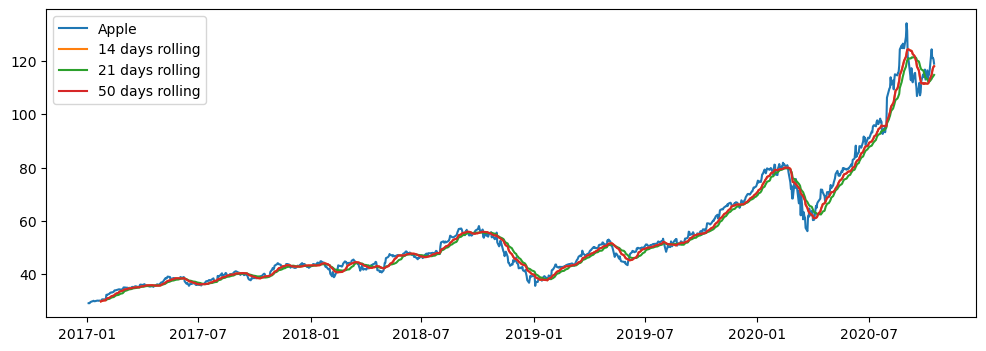

In [50]:
fig, ax = plt.subplots(figsize = (12,4))

ax.plot(VWs.index, VWs["Close"], label = 'Apple')
ax.plot(VWs["VW14"].index, VWs["VW14"], label = '14 days rolling')
ax.plot(VWs["VW21"].index, VWs["VW21"], label = '21 days rolling')
ax.plot(VWs["VW14"].index, VWs["VW14"], label = '50 days rolling')

ax.legend(loc = 'upper left')

In [51]:
def buy_sell_VW(data, opt=50):
    buy_sell = []
    buy_signal = []
    sell_signal = []
    flag = 42
    
    up = data[(np.array(data["VW14"] - data["VW21"]) > 0) & (np.array(data["VW14"] - data["VW50"]) > 0)]
    down = data[(np.array(data["VW14"] - data["VW21"]) < 0) & (np.array(data["VW14"] - data["VW50"]) < 0)]
    
    ups = np.percentile(np.array(up["VW14"] - up["VW21"]), opt)
    downs = np.percentile(np.array(down["VW14"] - down["VW50"]), opt)
    
    for i in range(0, len(data)):
        if (data["VW14"][i] > data["VW21"][i] + ups) & (data["VW14"][i] > data["VW50"][i] + ups):
            buy_signal.append(np.nan)
            if flag != 1:
                sell_signal.append(data["Close"][i])
                buy_sell.append(data["Close"][i])
                flag = 1
            else:
                sell_signal.append(np.nan)
        elif (data["VW14"][i] < data["VW21"][i] + downs) & (data["VW14"][i] < data["VW50"][i] + downs):
            sell_signal.append(np.nan)
            if flag != 0:
                buy_signal.append(data["Close"][i])
                buy_sell.append(-data["Close"][i])
                flag = 0
            else:
                buy_signal.append(np.nan)
        else:
            buy_sell.append(np.nan)
            sell_signal.append(np.nan)
            buy_signal.append(np.nan)
            
    operations = np.array(buy_sell)
    operations = operations[~ np.isnan(operations)]
    
    neg = 0
    pos = 0
    
    for i in range(len(operations)):
        if operations[i] < 0:
            neg = i
            break
    for i in range(1, len(operations)):
        if operations[-i] > 0:
            pos = i-1
            break
                
    operations = operations[neg:-pos]
    PL = np.sum(operations)
        
    return (buy_signal, sell_signal, PL)

In [52]:
VWs["BUY"] = buy_sell_VW(VWs)[0]
VWs["SELL"] = buy_sell_VW(VWs)[1]

In [53]:
buy_sell_VW(VWs)[2]

11.612503051757812

In [54]:
desicions = pd.merge(BBs[["BUY", "SELL"]], MAs[["BUY", "SELL"]], left_index = True, right_index = True)

desicions = pd.merge(desicions, MDs[["BUY", "SELL"]], left_index = True, right_index = True)

desicions = pd.merge(desicions, RSs[["BUY", "SELL"]], left_index = True, right_index = True)

desicions = pd.merge(desicions, VWs[["BUY", "SELL"]], left_index = True, right_index = True)

desicions.columns = ["BUY_MA", "SELL_MA", "BUY_BB", "SELL_BB", "BUY_MACD", "SELL_MACD", "BUY_RSI", "SELL_RSI", "BUY_VW", "SELL_VW"]

desicions.dropna(thresh = 1, axis = 0).head()

,BUY_MA,SELL_MA,BUY_BB,SELL_BB,BUY_MACD,SELL_MACD,BUY_RSI,SELL_RSI,BUY_VW,SELL_VW
Date,,,,,,,,,,
2017-03-28,NaN,35.950001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-13,NaN,NaN,NaN,NaN,35.262501,NaN,NaN,NaN,NaN,NaN
2017-04-18,NaN,NaN,NaN,NaN,NaN,NaN,35.299999,NaN,NaN,NaN
2017-04-19,NaN,NaN,35.169998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.645,NaN,NaN


#### KAYNAKLAR

[1] Mustafa Nayansak, Veri Bilimi Okulu, Python ile Finansal Veri Analizi: